### Juan Pablo Fonseca Correa - 138263

In [48]:
# importar librerías y leer la base de datos
import pandas as pd
import numpy as np
from scipy import sparse
from sys import maxint
from math import pow
from math import fabs
from __future__ import division
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from random import uniform
df = pd.read_csv('reglin.csv') # leo la bd 

In [49]:
# separar en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)
p = len(X_train.columns)

# tengo que estandarizarlos
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [50]:
def Vap(x, coeff):
    vap = 0
    for i in range(0,p+1):
        vap += coeff[i]*x[i]
    return vap

In [51]:
def error(coeff):
    y = coeff[0]
    for i in range(0,p):
        y += coeff[i+1]*X_train_sc ## OJO: tal vez esto no sirva para p > 1
    errores = [pow(y[i]-Y_train.iloc[i],2) for i in range(0,len(Y_train.values))]
    error = sum(errores)
    return error

## eta = 0.01

w's estandarizadas:
Pendiente: 
17.8985443262
Ordenada al origen: 
31.7900210549

errores: 


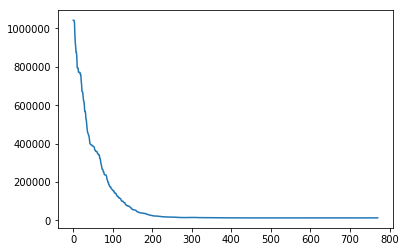

conforme avanzan las iteraciones, los errores van disminuyendo


In [66]:
w = [uniform(-5,5) for i in range(0,p+1)]
eta = 0.01
errores =[]
for i in range (0,len(X_train)):
    xi0 = [1]
    xidemas=[X_train_sc[i][j] for j in range(0,p)]
    xi = xi0 + xidemas
    yi = Y_train.iloc[i]
    error_actual = yi - Vap(xi,w)
    errores.append(error(w))
    # actualizas UNA vez para el dato i
    for j in range(len(w)):
        w[j] = w[j] + eta * error_actual * xi[j]

    # IMPRIMIR CADA ITERACIÓN
    # print "Error actual: {0}".format(error_actual)
    # print "Iteración {0}:".format(i+1)
    # for j in range(len(w)):
    #     print "w{0} = {1}   ".format(j,w[j])
    # print ""
# Muestro las w's
print "w's estandarizadas:"
print 'Pendiente: \n', w[1] # w1
print 'Ordenada al origen: \n', w[0] # w0
print ""

print "errores: " 
x = np.linspace(0, len(errores), len(errores), endpoint=False)
plt.plot(x,errores)
plt.show()
print "conforme avanzan las iteraciones, los errores van disminuyendo"

In [67]:
err = 0
for i in range(0,len(X_test_sc)):
    dif = Y_test.iloc[i] - Vap([1]+X_test_sc[i].tolist(),w)
    err += dif*dif
print "error:",err

error: 4603.68277442


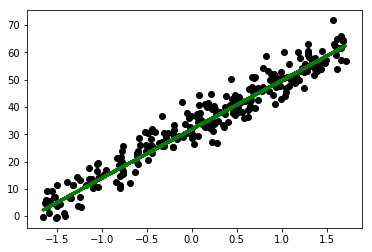

Recta obtenida con los datos de entrenamiento. Los puntos son datos de prueba. Con esto, se puede 'ver' que la recta es un buen modelo para nuevos datos.


In [68]:
plt.scatter(X_test_sc, Y_test,  color='black')
Y_predict = [Vap([1]+X_test_sc[k][:].tolist(),w) for k in range(len(X_test_sc[:,0]))]
plt.plot(X_test_sc, Y_predict, color='green', linewidth=3)
plt.show()
print "Recta obtenida con los datos de entrenamiento. Los puntos son datos de prueba. Con esto, se puede 'ver' que la recta es un buen modelo para nuevos datos."

## eta = 0.05

w's estandarizadas:
Pendiente: 
17.8342225989
Ordenada al origen: 
31.4413861741

errores: 


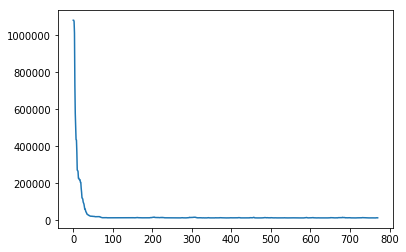

In [71]:
w = [uniform(-5,5) for i in range(0,p+1)]
eta = 0.05
errores =[]
for i in range (0,len(X_train)):
    xi0 = [1]
    xidemas=[X_train_sc[i][j] for j in range(0,p)]
    xi = xi0 + xidemas
    yi = Y_train.iloc[i]
    error_actual = yi - Vap(xi,w)
    errores.append(error(w))
    # actualizas UNA vez para el dato i
    for j in range(len(w)):
        w[j] = w[j] + eta * error_actual * xi[j]

    # IMPRIMIR CADA ITERACIÓN
    # print "Error actual: {0}".format(error_actual)
    # print "Iteración {0}:".format(i+1)
    # for j in range(len(w)):
    #     print "w{0} = {1}   ".format(j,w[j])
    # print ""
# Muestro las w's
print "w's estandarizadas:"
print 'Pendiente: \n', w[1] # w1
print 'Ordenada al origen: \n', w[0] # w0
print ""

print "errores: " 
x = np.linspace(0, len(errores), len(errores), endpoint=False)
plt.plot(x,errores)
plt.show()

###### conforme avanzan las iteraciones, los errores van disminuyendo

In [72]:
err = 0
for i in range(0,len(X_test_sc)):
    dif = Y_test.iloc[i] - Vap([1]+X_test_sc[i].tolist(),w)
    err += dif*dif
print "error:",err

error: 4783.34084085


## eta = 0.1

w's estandarizadas:
Pendiente: 
17.5935364236
Ordenada al origen: 
31.0116706505

errores: 


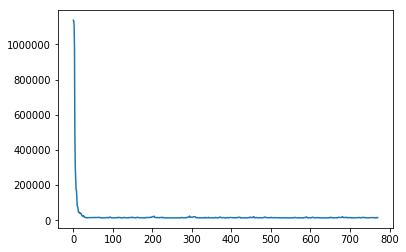

In [73]:
w = [uniform(-5,5) for i in range(0,p+1)]
eta = 0.1
errores =[]
for i in range (0,len(X_train)):
    xi0 = [1]
    xidemas=[X_train_sc[i][j] for j in range(0,p)]
    xi = xi0 + xidemas
    yi = Y_train.iloc[i]
    error_actual = yi - Vap(xi,w)
    errores.append(error(w))
    # actualizas UNA vez para el dato i
    for j in range(len(w)):
        w[j] = w[j] + eta * error_actual * xi[j]

    # IMPRIMIR CADA ITERACIÓN
    # print "Error actual: {0}".format(error_actual)
    # print "Iteración {0}:".format(i+1)
    # for j in range(len(w)):
    #     print "w{0} = {1}   ".format(j,w[j])
    # print ""
# Muestro las w's
print "w's estandarizadas:"
print 'Pendiente: \n', w[1] # w1
print 'Ordenada al origen: \n', w[0] # w0
print ""

print "errores: " 
x = np.linspace(0, len(errores), len(errores), endpoint=False)
plt.plot(x,errores)
plt.show()

###### conforme avanzan las iteraciones, los errores van disminuyendo

In [74]:
err = 0
for i in range(0,len(X_test_sc)):
    dif = Y_test.iloc[i] - Vap([1]+X_test_sc[i].tolist(),w)
    err += dif*dif
print "error:",err

error: 5113.5479818


## eta = 1

w's estandarizadas:
Pendiente: 
16.1068195317
Ordenada al origen: 
32.1969183143

errores: 


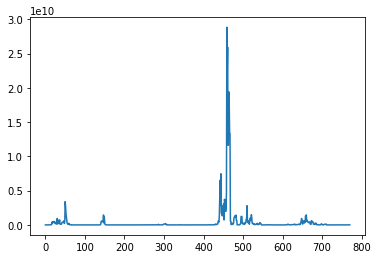

Se puede ver que con eta = 1 simplemente no funciona; el error no decrece.


In [75]:
w = [uniform(-5,5) for i in range(0,p+1)]
eta = 1
errores =[]
for i in range (0,len(X_train)):
    xi0 = [1]
    xidemas=[X_train_sc[i][j] for j in range(0,p)]
    xi = xi0 + xidemas
    yi = Y_train.iloc[i]
    error_actual = yi - Vap(xi,w)
    errores.append(error(w))
    # actualizas UNA vez para el dato i
    for j in range(len(w)):
        w[j] = w[j] + eta * error_actual * xi[j]

    # IMPRIMIR CADA ITERACIÓN
    # print "Error actual: {0}".format(error_actual)
    # print "Iteración {0}:".format(i+1)
    # for j in range(len(w)):
    #     print "w{0} = {1}   ".format(j,w[j])
    # print ""
# Muestro las w's
print "w's estandarizadas:"
print 'Pendiente: \n', w[1] # w1
print 'Ordenada al origen: \n', w[0] # w0
print ""

print "errores: " 
x = np.linspace(0, len(errores), len(errores), endpoint=False)
plt.plot(x,errores)
plt.show()
print "Se puede ver que con eta = 1 simplemente no funciona; el error no decrece."

### Parece que entre más grande la eta, más rápidamente se converge a un óptimo, y más rápidamente disminuye el error. Sin embargo, llega un límite en el cual con eta muy grande, ya deja de converger al óptimo, como se vio en este último caso.

In [76]:
err = 0
for i in range(0,len(X_test_sc)):
    dif = Y_test.iloc[i] - Vap([1]+X_test_sc[i].tolist(),w)
    err += dif*dif
print "error:",err

error: 5027.36209209
